# [프로젝트6] AI 기법 성능 향상 방법론


---

## 프로젝트 목표
---
- 하이퍼 매개변수 튜닝에 대해 배워봅니다.
- K-fold 교차 검증을 수행해봅니다.
- Residual network를 구현해봅니다.
- Positional encoding을 구현해봅니다.
- 금속분말 데이터셋에 대한 최적의 머신러닝 모델을 구현해봅니다.

## 프로젝트 목차
---
1. **Hyper-parameter 튜닝:** 하이퍼 매개변수 튜닝을 수행해봅니다.

2. **K-fold 교차검증:** K-fold 교차검증으로 모델을 평가해봅니다.

3. **Residual network:** Residual network를 구현해봅니다.

4. **Positional encoding:** Positional encoding을 구현해봅니다.

5. **최적의 모델 구현:** 여태까지 배웠던 것들을 종합하여 최적의 머신러닝 모델을 만들어봅니다.

## 프로젝트 개요
---

이번 프로젝트에서는 AI 모델의 성능 향상을 위한 다양한 기법을 수행해봅니다.

## 1. Hyper-parameter 튜닝
---
금속분말 데이터셋을 이용하여 하이퍼 매개변수 튜닝을 수행해보겠습니다.


### 1.1 라이브러리 불러오기

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
import json
import sklearn.metrics

### 1.2 데이터셋 읽어오기

In [2]:
stage1 = {
    'train_X': np.load('./Data/train_data_stage1_X.npy'),
    'train_y': np.load('./Data/train_data_stage1_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage1_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage1_y.npy'),
    'test_X': np.load('./Data/test_data_stage1_X.npy'),
    'test_y': np.load('./Data/test_data_stage1_y.npy'),
}

stage2 = {
    'train_X': np.load('./Data/train_data_stage2_X.npy'),
    'train_y': np.load('./Data/train_data_stage2_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage2_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage2_y.npy'),
    'test_X': np.load('./Data/test_data_stage2_X.npy'),
    'test_y': np.load('./Data/test_data_stage2_y.npy'),
}

columns = json.load(open('./Data/valid_columns.json', 'r'))

### 1.3 데이터 표준화하기

### 1.3.1 Stage1 데이터 표준화하기

In [3]:
stage1_X_mean = stage1['train_X'].mean(axis = 0)
stage1_y_mean = stage1['train_y'].mean(axis = 0)
print('입력값 평균:', stage1_X_mean)
print('출력값 평균:', stage1_y_mean)

입력값 평균: [  11.85294587  205.74478705  951.00255435 1242.437388     72.01273285
   72.01162996   70.34571071   11.07603585  408.95062376   81.47648118
   75.96962985   12.79330524  566.38390195  202.65058918   68.99620414
   69.10054828   73.3958155    13.89662164  226.12474952   76.81680896
   59.99898793    9.08815439  205.71384206  425.06943434  202.26546402
   78.00841235   78.00453278  345.11532917   13.26721071  246.73680272
   74.14375402   65.00868711  108.96768422   84.98831262   80.00354672
   15.32405834   23.84402174]
출력값 평균: [12.89768652 13.69662267  8.00480187 11.36113325 21.31940678 32.87843839
  0.12721732  1.34725458  1.09990652 19.8051213   7.68305334  1.4919701
  1.20588607  2.89104562 10.02515553]


In [4]:
stage1_X_std = stage1['train_X'].std(axis = 0)
stage1_y_std = stage1['train_y'].std(axis = 0)
print('입력값 표준편차:', stage1_X_std)
print('출력값 표준편차:', stage1_y_std)

입력값 표준편차: [5.10993143e-01 1.16806618e+01 1.27620111e+02 9.77321235e+01
 6.23396785e-02 4.06238919e-01 5.49867530e+00 6.36170724e-01
 2.05368437e+01 9.21642493e-01 2.06429784e+00 1.07360805e-01
 1.83380514e+01 1.48381842e+01 5.44970706e-02 1.06721153e-01
 3.94100055e-01 2.91335938e-02 3.06908107e+00 8.30358591e-01
 1.61971729e-01 3.95092636e-01 1.63223059e+01 9.53699574e+00
 1.58921785e+01 7.73526529e-02 1.14547773e-01 9.05396328e+00
 4.34061012e-01 6.10492128e+00 2.05042127e+00 6.27961350e-02
 5.59761035e+00 1.85637963e+01 1.18126539e-01 1.18770739e+00
 3.72221796e-01]
출력값 표준편차: [0.9270819  0.85503751 6.90580271 1.03664992 2.14313701 3.882343
 0.57606676 1.13060617 1.41265541 4.68687927 1.07824517 2.54294205
 0.66114934 0.92884134 7.38778856]


In [5]:
# 학습 데이터 표준화
stage1['train_X'] = (stage1['train_X'] - stage1_X_mean) / stage1_X_std
stage1['train_y'] = (stage1['train_y'] - stage1_y_mean) / stage1_y_std
# 검증용 데이터 표준화
stage1['valid_X'] = (stage1['valid_X'] - stage1_X_mean) / stage1_X_std
stage1['valid_y'] = (stage1['valid_y'] - stage1_y_mean) / stage1_y_std
# 테스트 데이터 표준화
stage1['test_X'] = (stage1['test_X'] - stage1_X_mean) / stage1_X_std
stage1['test_y'] = (stage1['test_y'] - stage1_y_mean) / stage1_y_std

### 1.3.2 Stage2 데이터 표준화하기

In [6]:
stage2_X_mean = stage2['train_X'].mean(axis = 0)
stage2_y_mean = stage2['train_y'].mean(axis = 0)
print('입력값 평균:', stage2_X_mean)
print('출력값 평균:', stage2_y_mean)

입력값 평균: [1.28976865e+01 1.36966227e+01 8.00480187e+00 1.13611333e+01
 2.13194068e+01 3.28784384e+01 1.27217323e-01 1.34725458e+00
 1.09990652e+00 1.98051213e+01 7.68305334e+00 1.49197010e+00
 1.20588607e+00 2.89104562e+00 1.00251555e+01 3.60122933e+02
 3.60136275e+02 1.72294333e+01 3.22627969e+02 3.09786854e+02
 1.87200947e+02 3.09998282e+02 2.89997582e+02 2.69681649e+02
 2.42661246e+02 2.44994629e+02 6.34195390e+01 1.54046742e+02
 1.53240583e+01 2.38440217e+01]
출력값 평균: [11.69212911  6.25614828 10.2499656  19.33555126  2.87697932  2.7475277
  0.53310706  2.91750962 18.38898671 11.61424043  7.53420311  3.54181714
  7.51699723]


In [7]:
stage2_X_std = stage2['train_X'].std(axis = 0)
stage2_y_std = stage2['train_y'].std(axis = 0)
print('입력값 표준편차:', stage2_X_std)
print('출력값 표준편차:', stage2_y_std)

입력값 표준편차: [ 0.9270819   0.85503751  6.90580271  1.03664992  2.14313701  3.882343
  0.57606676  1.13060617  1.41265541  4.68687927  1.07824517  2.54294205
  0.66114934  0.92884134  7.38778856  1.9209727   2.64895901  0.94209921
  3.61537985  2.74078134 23.41676809  0.03961971  0.05202987  1.01853204
  1.59098238  0.10771334  0.39587306  9.90869048  1.18770739  0.3722218 ]
출력값 표준편차: [3.62230517 1.60057596 2.30753588 4.62537631 9.09270122 0.37574164
 0.20467783 0.49744294 4.97294003 7.62127826 1.64901449 0.45450424
 2.0723342 ]


In [8]:
# 학습 데이터 표준화
stage2['train_X'] = (stage2['train_X'] - stage2_X_mean) / stage2_X_std
stage2['train_y'] = (stage2['train_y'] - stage2_y_mean) / stage2_y_std

# 검증용 데이터 표준화
stage2['valid_X'] = (stage2['valid_X'] - stage2_X_mean) / stage2_X_std
stage2['valid_y'] = (stage2['valid_y'] - stage2_y_mean) / stage2_y_std

# 테스트 데이터 표준화
stage2['test_X'] = (stage2['test_X'] - stage2_X_mean) / stage2_X_std
stage2['test_y'] = (stage2['test_y'] - stage2_y_mean) / stage2_y_std

### 1.4 Hyper-parameter 범위 설정하기

랜덤 서치를 이용한 하이퍼패러미터 설정을 해봅니다. 이때 실습 시간을 고려하여, 학습데이터 중 1000개만 사용해봅니다.

In [9]:
learning_rate = [0.005, 0.03]
dropout_rate = [0.0, 0.2]
trials = 10

In [10]:
def sampling(parameter_range):
    min_value, max_value = parameter_range
    random_value = np.random.random()
    return random_value * (max_value - min_value) + min_value

In [11]:
lrs = []
drs = []
r2s = []
for try_ in range(trials):
    np.random.seed(try_)
    lr = sampling(learning_rate)
    dr = sampling(dropout_rate)
    print('%d 번째 시도 - 학습률: %.3f, dropout rate: %.3f'%(try_ + 1, lr, dr))
    
    # 모델 정의
    np.random.seed(0)
    random.seed(0)
    tf.random.set_seed(0)
    MLP_model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(rate=dr), 
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dropout(rate=dr), 
        tf.keras.layers.Dense(stage1['train_y'].shape[1])
    ])
    # 모델 컴파일
    MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
              metrics = ['mse'])
    # 모델 학습
    history = MLP_model.fit(stage1['train_X'][:1000], stage1['train_y'][:1000], epochs = 50, batch_size = 16, verbose = 0)
    # 모델 예측
    pred = MLP_model.predict(stage1['test_X'])
    # 모델 평가
    r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
    print("    -> R2 score: %f"%r2)
    lrs.append(lr)
    drs.append(dr)
    r2s.append(r2)
    

1 번째 시도 - 학습률: 0.019, dropout rate: 0.143
    -> R2 score: 0.309394
2 번째 시도 - 학습률: 0.015, dropout rate: 0.144
    -> R2 score: 0.296470
3 번째 시도 - 학습률: 0.016, dropout rate: 0.005
    -> R2 score: 0.301790
4 번째 시도 - 학습률: 0.019, dropout rate: 0.142
    -> R2 score: 0.309891
5 번째 시도 - 학습률: 0.029, dropout rate: 0.109
    -> R2 score: 0.332541
6 번째 시도 - 학습률: 0.011, dropout rate: 0.174
    -> R2 score: 0.270235
7 번째 시도 - 학습률: 0.027, dropout rate: 0.066
    -> R2 score: 0.325144
8 번째 시도 - 학습률: 0.007, dropout rate: 0.156
    -> R2 score: 0.247721
9 번째 시도 - 학습률: 0.027, dropout rate: 0.194
    -> R2 score: 0.321677
10 번째 시도 - 학습률: 0.005, dropout rate: 0.100
    -> R2 score: 0.239465


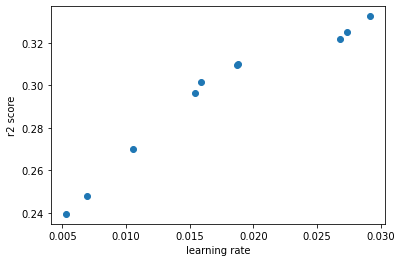

In [12]:
plt.scatter(lrs, r2s)
plt.xlabel('learning rate')
plt.ylabel('r2 score')
plt.show()

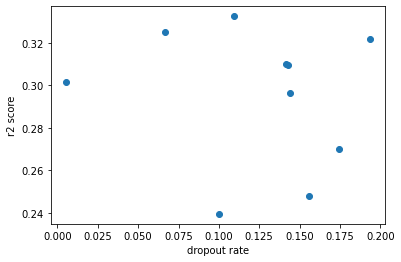

In [13]:
plt.scatter(drs, r2s)
plt.xlabel('dropout rate')
plt.ylabel('r2 score')
plt.show()

In [14]:
np.corrcoef(lrs, r2s)[1,0]

0.9595704772888924

In [15]:
np.corrcoef(drs, r2s)[1,0]

-0.13015050370379325

학습률은 모델의 성능과 상관 관계가 큰 반면, dropout rate는 비교적 상관 관계가 약한 것을 확인할 수 있습니다.

**[TODO] Stage 2 데이터에 대해 hyper-parameter 튜닝을 수행해보세요.**

In [16]:
lrs = []
drs = []
r2s = []
for try_ in range(trials):
    np.random.seed(try_)
    lr = sampling(learning_rate)
    dr = sampling(dropout_rate)
    print('%d 번째 시도 - 학습률: %.3f, dropout rate: %.3f'%(try_ + 1, lr, dr))
    
    # 모델 정의
    np.random.seed(0)
    random.seed(0)
    tf.random.set_seed(0)
    MLP_model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(rate=dr), 
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dropout(rate=dr), 
        tf.keras.layers.Dense(stage2['train_y'].shape[1])
    ])
    # 모델 컴파일
    MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
              metrics = ['mse'])
    # 모델 학습
    history = MLP_model.fit(stage2['train_X'][:1000], stage2['train_y'][:1000], epochs = 50, batch_size = 16, verbose = 0)
    # 모델 예측
    pred = MLP_model.predict(stage2['test_X'])
    # 모델 평가
    r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
    print("    -> R2 score: %f"%r2)
    lrs.append(lr)
    drs.append(dr)
    r2s.append(r2)
    

1 번째 시도 - 학습률: 0.019, dropout rate: 0.143
    -> R2 score: 0.498043
2 번째 시도 - 학습률: 0.015, dropout rate: 0.144
    -> R2 score: 0.489687
3 번째 시도 - 학습률: 0.016, dropout rate: 0.005
    -> R2 score: 0.494187
4 번째 시도 - 학습률: 0.019, dropout rate: 0.142
    -> R2 score: 0.498524
5 번째 시도 - 학습률: 0.029, dropout rate: 0.109
    -> R2 score: 0.521597
6 번째 시도 - 학습률: 0.011, dropout rate: 0.174
    -> R2 score: 0.471398
7 번째 시도 - 학습률: 0.027, dropout rate: 0.066
    -> R2 score: 0.521226
8 번째 시도 - 학습률: 0.007, dropout rate: 0.156
    -> R2 score: 0.458098
9 번째 시도 - 학습률: 0.027, dropout rate: 0.194
    -> R2 score: 0.499725
10 번째 시도 - 학습률: 0.005, dropout rate: 0.100
    -> R2 score: 0.451818


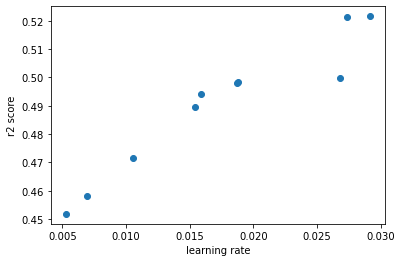

In [17]:
plt.scatter(lrs, r2s)
plt.xlabel('learning rate')
plt.ylabel('r2 score')
plt.show()

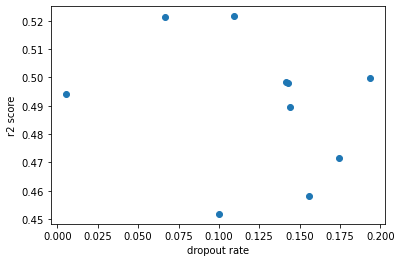

In [18]:
plt.scatter(drs, r2s)
plt.xlabel('dropout rate')
plt.ylabel('r2 score')
plt.show()

In [19]:
np.corrcoef(lrs, r2s)[1,0]

0.9548047389481391

In [20]:
np.corrcoef(drs, r2s)[1,0]

-0.2395229232249606

Stage2 에서도 마찬가지로 학습률이 전체 성능에 큰 영향을 미치는 것을 확인할 수 있습니다.

## 2. K-fold 교차 검증

### 2.1 데이터 합치기

In [21]:
X_stage1 = np.concatenate([stage1['train_X'], stage1['valid_X']])
y_stage1 = np.concatenate([stage1['train_y'], stage1['valid_y']])

In [22]:
def get_K_fold_dataset(X, y, K):
    dataset = {}
    len_data = len(X)
    idxs = np.arange(len_data)
    for k in range(K):
        training_idxs = np.concatenate([idxs[:int(len_data * k/K)], idxs[int(len_data * (k+1)/K):]])
        valid_idxs = idxs[int(len_data * k/K) : int(len_data * (k+1)/K)]
        dataset['%d-fold'%(k+1)] = {
            'train_X': X[training_idxs],
            'valid_X': X[valid_idxs],
            'train_y': y[training_idxs],
            'valid_y': y[valid_idxs]
        }
    return dataset

데이터를 K 개의 학습-테스트 셋으로 분리하는 함수를 정의합니다.

In [23]:
K_fold = get_K_fold_dataset(X_stage1, y_stage1, 5)

In [24]:
r2s = []
for K in K_fold.keys():
    dataset = K_fold[K]
    print('%s'%K)
    # 모델 정의
    np.random.seed(0)
    random.seed(0)
    tf.random.set_seed(0)
    MLP_model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(stage1['train_y'].shape[1])
    ])
    # 모델 컴파일
    MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])
    # 모델 학습
    history = MLP_model.fit(dataset['train_X'], dataset['train_y'], epochs = 50, batch_size = 16, verbose = 0)
    # 모델 예측
    pred = MLP_model.predict(dataset['valid_X'])
    # 모델 평가
    r2 = sklearn.metrics.r2_score(dataset['valid_y'], pred)
    print("    -> R2 score: %f"%r2)
    r2s.append(r2)

1-fold
    -> R2 score: 0.485120
2-fold
    -> R2 score: 0.558948
3-fold
    -> R2 score: 0.488304
4-fold
    -> R2 score: 0.535690
5-fold
    -> R2 score: 0.493803


In [25]:
Average_r2 = np.mean(r2s)
print("Average R2 score: %f"%Average_r2)

Average R2 score: 0.512373


모델의 최종 성능을 평가할 때에는, K개의 fold에서 나온 성능의 평균을 취합니다.

**[TODO] Stage2 데이터에 대해 K-fold 교차검증을 수행해보세요.**

In [26]:
X_stage2 = np.concatenate([stage2['train_X'], stage2['valid_X']])
y_stage2 = np.concatenate([stage2['train_y'], stage2['valid_y']])

In [27]:
K_fold = get_K_fold_dataset(X_stage2, y_stage2, 5)

In [28]:
r2s = []
for K in K_fold.keys():
    dataset = K_fold[K]
    print('%s'%K)
    # 모델 정의
    np.random.seed(0)
    random.seed(0)
    tf.random.set_seed(0)
    MLP_model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(stage2['train_y'].shape[1])
    ])
    # 모델 컴파일
    MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])
    # 모델 학습
    history = MLP_model.fit(dataset['train_X'], dataset['train_y'], epochs = 50, batch_size = 16, verbose = 0)
    # 모델 예측
    pred = MLP_model.predict(dataset['valid_X'])
    # 모델 평가
    r2 = sklearn.metrics.r2_score(dataset['valid_y'], pred)
    print("    -> R2 score: %f"%r2)
    r2s.append(r2)

1-fold
    -> R2 score: 0.649753
2-fold
    -> R2 score: 0.625548
3-fold
    -> R2 score: 0.670080
4-fold
    -> R2 score: 0.631091
5-fold
    -> R2 score: 0.665096


In [29]:
Average_r2 = np.mean(r2s)
print("Average R2 score: %f"%Average_r2)

Average R2 score: 0.648313


## 3. Residual network

### 3.1 Residual network 정의

In [30]:
class ResidualMLP(tf.keras.Model):
    def __init__(self, out_dim, use_residual):
        super(ResidualMLP, self).__init__()
        self.use_residual = use_residual

        self.fc1 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc2 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc3 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc4 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc5 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc6 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc7 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc8 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc9 = tf.keras.layers.Dense(out_dim)

    def call(self, x):
        if self.use_residual:
            h = self.fc1(x)
            h = self.fc2(h) + h
            h = self.fc3(h) + h
            h = self.fc4(h) + h
            h = self.fc5(h) + h
            h = self.fc6(h) + h
            h = self.fc7(h) + h
            h = self.fc8(h) + h
            h = self.fc9(h)
        else:
            h = self.fc1(x)
            h = self.fc2(h)
            h = self.fc3(h)
            h = self.fc4(h)
            h = self.fc5(h)
            h = self.fc6(h)
            h = self.fc7(h)
            h = self.fc8(h)
            h = self.fc9(h)
        return h

Resiudal network 같이 복잡한 네트워크를 정의하기 위해서는 Sequential 보다 위 처럼 직접 class 를 정의하는 것이 편리합니다.

In [31]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model_residual = ResidualMLP(stage1['train_y'].shape[1], use_residual = True)

### 3.2 Residual network 컴파일

In [32]:
MLP_model_residual.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])

### 3.3 Residual network 학습

In [33]:
history = MLP_model_residual.fit(stage1['train_X'], stage1['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 1.1554 - mse: 1.1554
Epoch 2/50
564/564 - 1s - loss: 0.8017 - mse: 0.8017
Epoch 3/50
564/564 - 1s - loss: 0.7440 - mse: 0.7440
Epoch 4/50
564/564 - 1s - loss: 0.7030 - mse: 0.7030
Epoch 5/50
564/564 - 1s - loss: 0.6750 - mse: 0.6750
Epoch 6/50
564/564 - 1s - loss: 0.6579 - mse: 0.6579
Epoch 7/50
564/564 - 1s - loss: 0.6428 - mse: 0.6428
Epoch 8/50
564/564 - 1s - loss: 0.6276 - mse: 0.6276
Epoch 9/50
564/564 - 1s - loss: 0.6121 - mse: 0.6121
Epoch 10/50
564/564 - 1s - loss: 0.5988 - mse: 0.5988
Epoch 11/50
564/564 - 1s - loss: 0.5861 - mse: 0.5861
Epoch 12/50
564/564 - 1s - loss: 0.5740 - mse: 0.5740
Epoch 13/50
564/564 - 1s - loss: 0.5600 - mse: 0.5600
Epoch 14/50
564/564 - 1s - loss: 0.5462 - mse: 0.5462
Epoch 15/50
564/564 - 1s - loss: 0.5387 - mse: 0.5387
Epoch 16/50
564/564 - 1s - loss: 0.5211 - mse: 0.5211
Epoch 17/50
564/564 - 1s - loss: 0.5260 - mse: 0.5260
Epoch 18/50
564/564 - 1s - loss: 0.5154 - mse: 0.5154
Epoch 19/50
564/564 - 1s - loss: 0.49

### 3.4 Residual network 예측 및 평가

In [34]:
pred = MLP_model_residual.predict(stage1['test_X'])

In [35]:
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.595793


### 3.5 일반 MLP 와의 성능 비교

In [36]:
# 모델 정의
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model = ResidualMLP(stage1['train_y'].shape[1], use_residual = False)

use_residual 을 False로 설정하여 일반 MLP 네트워크를 정의합니다.

In [37]:
# 모델 컴파일
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])

In [38]:
# 모델 학습
history = MLP_model.fit(stage1['train_X'], stage1['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.9989 - mse: 0.9989
Epoch 2/50
564/564 - 0s - loss: 0.9883 - mse: 0.9883
Epoch 3/50
564/564 - 0s - loss: 0.9532 - mse: 0.9532
Epoch 4/50
564/564 - 0s - loss: 0.8913 - mse: 0.8913
Epoch 5/50
564/564 - 0s - loss: 0.8536 - mse: 0.8536
Epoch 6/50
564/564 - 0s - loss: 0.8333 - mse: 0.8333
Epoch 7/50
564/564 - 0s - loss: 0.8171 - mse: 0.8171
Epoch 8/50
564/564 - 0s - loss: 0.8006 - mse: 0.8006
Epoch 9/50
564/564 - 0s - loss: 0.7834 - mse: 0.7834
Epoch 10/50
564/564 - 1s - loss: 0.7641 - mse: 0.7641
Epoch 11/50
564/564 - 1s - loss: 0.7450 - mse: 0.7450
Epoch 12/50
564/564 - 0s - loss: 0.7278 - mse: 0.7278
Epoch 13/50
564/564 - 0s - loss: 0.7129 - mse: 0.7129
Epoch 14/50
564/564 - 0s - loss: 0.6995 - mse: 0.6995
Epoch 15/50
564/564 - 0s - loss: 0.6880 - mse: 0.6880
Epoch 16/50
564/564 - 0s - loss: 0.6788 - mse: 0.6788
Epoch 17/50
564/564 - 0s - loss: 0.6704 - mse: 0.6704
Epoch 18/50
564/564 - 0s - loss: 0.6635 - mse: 0.6635
Epoch 19/50
564/564 - 0s - loss: 0.65

In [39]:
# 모델 예측
pred = MLP_model.predict(stage1['test_X'])

In [40]:
# 모델 평가
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.410394


Residual network 가 더 성능이 좋은 것을 확인할 수 있습니다.

**[TODO] Stage2 데이터에 대해 Residual network 를 학습해보세요.**

In [41]:
# resiudal network 모델 정의
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model_residual = ResidualMLP(stage2['train_y'].shape[1], use_residual = True)

# resiudal network 사용하지 않는 모델 정의
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model = ResidualMLP(stage2['train_y'].shape[1], use_residual = False)

In [42]:
# 모델 컴파일
MLP_model_residual.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])

In [43]:
# residual 모델 학습
MLP_model_residual.fit(stage2['train_X'], stage2['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 1.1114 - mse: 1.1114
Epoch 2/50
564/564 - 1s - loss: 0.5810 - mse: 0.5810
Epoch 3/50
564/564 - 0s - loss: 0.5183 - mse: 0.5183
Epoch 4/50
564/564 - 1s - loss: 0.4848 - mse: 0.4848
Epoch 5/50
564/564 - 1s - loss: 0.4677 - mse: 0.4677
Epoch 6/50
564/564 - 1s - loss: 0.4565 - mse: 0.4565
Epoch 7/50
564/564 - 1s - loss: 0.4483 - mse: 0.4483
Epoch 8/50
564/564 - 1s - loss: 0.4412 - mse: 0.4412
Epoch 9/50
564/564 - 1s - loss: 0.4346 - mse: 0.4346
Epoch 10/50
564/564 - 1s - loss: 0.4279 - mse: 0.4279
Epoch 11/50
564/564 - 0s - loss: 0.4218 - mse: 0.4218
Epoch 12/50
564/564 - 0s - loss: 0.4168 - mse: 0.4168
Epoch 13/50
564/564 - 1s - loss: 0.4119 - mse: 0.4119
Epoch 14/50
564/564 - 1s - loss: 0.4071 - mse: 0.4071
Epoch 15/50
564/564 - 1s - loss: 0.4026 - mse: 0.4026
Epoch 16/50
564/564 - 1s - loss: 0.3977 - mse: 0.3977
Epoch 17/50
564/564 - 1s - loss: 0.3919 - mse: 0.3919
Epoch 18/50
564/564 - 1s - loss: 0.3885 - mse: 0.3885
Epoch 19/50
564/564 - 1s - loss: 0.38

In [44]:
# 일반 MLP 모델 학습
MLP_model.fit(stage2['train_X'], stage2['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.9889 - mse: 0.9889
Epoch 2/50
564/564 - 0s - loss: 0.8115 - mse: 0.8115
Epoch 3/50
564/564 - 0s - loss: 0.6353 - mse: 0.6353
Epoch 4/50
564/564 - 0s - loss: 0.6166 - mse: 0.6166
Epoch 5/50
564/564 - 0s - loss: 0.5992 - mse: 0.5992
Epoch 6/50
564/564 - 0s - loss: 0.5780 - mse: 0.5780
Epoch 7/50
564/564 - 0s - loss: 0.5562 - mse: 0.5562
Epoch 8/50
564/564 - 0s - loss: 0.5357 - mse: 0.5357
Epoch 9/50
564/564 - 0s - loss: 0.5174 - mse: 0.5174
Epoch 10/50
564/564 - 0s - loss: 0.5026 - mse: 0.5026
Epoch 11/50
564/564 - 0s - loss: 0.4900 - mse: 0.4900
Epoch 12/50
564/564 - 0s - loss: 0.4805 - mse: 0.4805
Epoch 13/50
564/564 - 0s - loss: 0.4731 - mse: 0.4731
Epoch 14/50
564/564 - 0s - loss: 0.4647 - mse: 0.4647
Epoch 15/50
564/564 - 0s - loss: 0.4579 - mse: 0.4579
Epoch 16/50
564/564 - 0s - loss: 0.4475 - mse: 0.4475
Epoch 17/50
564/564 - 0s - loss: 0.4348 - mse: 0.4348
Epoch 18/50
564/564 - 0s - loss: 0.4253 - mse: 0.4253
Epoch 19/50
564/564 - 0s - loss: 0.41

In [63]:
# Residual 모델 예측
pred = MLP_model_residual.predict(stage2['test_X'])

In [64]:
# Residual 모델 평가
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.660308


In [47]:
# 일반 MLP 모델 예측
pred = MLP_model.predict(stage2['test_X'])

In [48]:
# 일반 MLP 모델 평가
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.638714


## 4. Positional encoding

In [49]:
def positional_encoding(X, L):
    Xs = []
    for l in range(L):
        Xs.append(np.sin(2 ** l * np.pi * X))
        Xs.append(np.cos(2 ** l * np.pi * X))        
    return np.concatenate(Xs, axis = -1)

입력 데이터를 L개의 frequency를 가진 데이터로 변환하는 함수를 정의합니다.

In [50]:
train_X = positional_encoding(stage1['train_X'], 5)
test_X = positional_encoding(stage1['test_X'], 5)

In [51]:
train_X.shape

(9016, 370)

In [52]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model_pe = ResidualMLP(stage1['train_y'].shape[1], use_residual = True)

In [53]:
MLP_model_pe.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])

In [54]:
history = MLP_model_pe.fit(train_X, stage1['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.9860 - mse: 0.9860
Epoch 2/50
564/564 - 1s - loss: 0.7869 - mse: 0.7869
Epoch 3/50
564/564 - 1s - loss: 0.7251 - mse: 0.7251
Epoch 4/50
564/564 - 1s - loss: 0.6654 - mse: 0.6654
Epoch 5/50
564/564 - 1s - loss: 0.6307 - mse: 0.6307
Epoch 6/50
564/564 - 1s - loss: 0.6077 - mse: 0.6077
Epoch 7/50
564/564 - 1s - loss: 0.5850 - mse: 0.5850
Epoch 8/50
564/564 - 1s - loss: 0.5548 - mse: 0.5548
Epoch 9/50
564/564 - 1s - loss: 0.5220 - mse: 0.5220
Epoch 10/50
564/564 - 1s - loss: 0.4918 - mse: 0.4918
Epoch 11/50
564/564 - 1s - loss: 0.4750 - mse: 0.4750
Epoch 12/50
564/564 - 1s - loss: 0.4494 - mse: 0.4494
Epoch 13/50
564/564 - 1s - loss: 0.4307 - mse: 0.4307
Epoch 14/50
564/564 - 1s - loss: 0.4168 - mse: 0.4168
Epoch 15/50
564/564 - 1s - loss: 0.4058 - mse: 0.4058
Epoch 16/50
564/564 - 1s - loss: 0.3917 - mse: 0.3917
Epoch 17/50
564/564 - 1s - loss: 0.3935 - mse: 0.3935
Epoch 18/50
564/564 - 1s - loss: 0.3991 - mse: 0.3991
Epoch 19/50
564/564 - 1s - loss: 0.38

In [55]:
pred = MLP_model_pe.predict(test_X)

In [56]:
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.599138


**[TODO] Stage2 데이터에 대해 positional encoding 적용해보기**

In [57]:
train_X = positional_encoding(stage2['train_X'], 5)
test_X = positional_encoding(stage2['test_X'], 5)

In [58]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model_pe = ResidualMLP(stage2['train_y'].shape[1], use_residual = True)

In [59]:
MLP_model_pe.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])

In [60]:
history = MLP_model_pe.fit(train_X, stage2['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.8095 - mse: 0.8095
Epoch 2/50
564/564 - 1s - loss: 0.5806 - mse: 0.5806
Epoch 3/50
564/564 - 1s - loss: 0.5197 - mse: 0.5197
Epoch 4/50
564/564 - 1s - loss: 0.4760 - mse: 0.4760
Epoch 5/50
564/564 - 1s - loss: 0.4564 - mse: 0.4564
Epoch 6/50
564/564 - 1s - loss: 0.4457 - mse: 0.4457
Epoch 7/50
564/564 - 1s - loss: 0.4380 - mse: 0.4380
Epoch 8/50
564/564 - 1s - loss: 0.4315 - mse: 0.4315
Epoch 9/50
564/564 - 1s - loss: 0.4273 - mse: 0.4273
Epoch 10/50
564/564 - 1s - loss: 0.4226 - mse: 0.4226
Epoch 11/50
564/564 - 1s - loss: 0.4099 - mse: 0.4099
Epoch 12/50
564/564 - 1s - loss: 0.3824 - mse: 0.3824
Epoch 13/50
564/564 - 1s - loss: 0.3616 - mse: 0.3616
Epoch 14/50
564/564 - 1s - loss: 0.3534 - mse: 0.3534
Epoch 15/50
564/564 - 1s - loss: 0.3477 - mse: 0.3477
Epoch 16/50
564/564 - 1s - loss: 0.3446 - mse: 0.3446
Epoch 17/50
564/564 - 1s - loss: 0.3416 - mse: 0.3416
Epoch 18/50
564/564 - 1s - loss: 0.3386 - mse: 0.3386
Epoch 19/50
564/564 - 1s - loss: 0.33

In [61]:
pred = MLP_model_pe.predict(test_X)

In [62]:
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.672677


## 5. 최적의 머신러닝 모델 구현

여태까지 배운 머신러닝 방법론을 종합하여 금속분말 데이터셋에 대해 최고 성능을 발휘하는 최적의 모델을 만들어보세요.

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>